# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [ ]:
pip install requests_mock


In [ ]:
pip install clyent==1.2.1 nbformat==5.4.0


In [ ]:
!python -m pip install kaggle==1.6.12

In [ ]:
pip uninstall numpy scipy numba python-dateutil gensim


In [ ]:
pip install numpy==1.23.5
pip install scipy==1.10.0
pip install numba==0.56.4
pip install python-dateutil==2.8.2
pip install FuzzyTM

In [ ]:
pip install gensim==4.3.0

In [ ]:
!pip install ucimlrepo

In [ ]:
pip install lxml

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

I will be gathering NFL data from the 2021 season to see how does team performance vary between home and away games? I am looking to look at specific statistics like win percentage, points scored and points allowed. 

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File.

Method: The data was gathered using the "Download" method from Kaggle. [NFL Teams Stats And Outcomes](https://www.kaggle.com/datasets/thedevastator/nfl-team-stats-and-outcomes). I chose this dataset because it has clear data for stats from each team that I will use to answer my question.
 


Relevant Dataset variables:

*   TotYd: The team's total yards
*   TotYd.1: The opponent's total yards.

In [2]:
import pandas as pd
dfKaggle = pd.read_csv('NFL_2021_Kaggle.csv')

In [3]:
dfKaggle.head()

,Unnamed: 0,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,0,1,Sun,12-Sep,W,Detroit Lions,41.0,33.0,21.0,442.0,...,2.0,31.0,430.0,314.0,116.0,1.0,15.48,-5.16,-1.73,San Francisco 49ers
1,1,2,Sun,19-Sep,W,Philadelphia Eagles,17.0,11.0,23.0,306.0,...,NaN,18.0,328.0,177.0,151.0,NaN,7.86,-5.30,2.68,San Francisco 49ers
2,2,3,Sun,26-Sep,L,Green Bay Packers,28.0,30.0,26.0,298.0,...,2.0,21.0,353.0,253.0,100.0,NaN,12.19,-15.14,0.95,San Francisco 49ers
3,3,4,Sun,3-Oct,L,Seattle Seahawks,21.0,28.0,23.0,457.0,...,2.0,14.0,234.0,129.0,105.0,NaN,8.61,-2.20,-14.31,San Francisco 49ers
4,4,5,Sun,10-Oct,L,Arizona Cardinals,10.0,17.0,19.0,338.0,...,1.0,20.0,304.0,210.0,94.0,1.0,-6.53,-1.74,-0.47,San Francisco 49ers


#### Dataset 2

Type: HTML Table

Method: The data was gathered using the "Web Scraping" method from [ProFootballReference](https://www.pro-football-reference.com/years/2021/games.htm). The table data was extraced from the webpage using 'requests' and 'BeautifulSoup', and then converted into a pandas Dataframe. I chose this dataset because it clearly has the points of the game for each team.

Dataset variables:

*   Pts - Points scored by each team
*   Winner/Tie & Loser/Tie - Clear who has won and loss



In [4]:
from io import StringIO
from bs4 import BeautifulSoup
import requests

# URL of the page with the table
url = 'https://www.pro-football-reference.com/years/2021/games.htm'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table
table = soup.find('table', {'id': 'games'})

# Convert the table to a string
table_html = str(table)

# Wrap the HTML content with StringIO
table_io = StringIO(table_html)

# Read the HTML content into a DataFrame
dfPFR = pd.read_html(table_io)[0]

# Print the DataFrame to verify
print(dfPFR.head())

  Week  Day        Date    Time            Winner/tie Unnamed: 5  \
0    1  Thu  2021-09-09  8:20PM  Tampa Bay Buccaneers        NaN   
1    1  Sun  2021-09-12  1:00PM   Philadelphia Eagles          @   
2    1  Sun  2021-09-12  1:00PM   Pittsburgh Steelers          @   
3    1  Sun  2021-09-12  1:00PM     Carolina Panthers        NaN   
4    1  Sun  2021-09-12  1:00PM    Cincinnati Bengals        NaN   

           Loser/tie Unnamed: 7 Pts Pts.1 YdsW TOW YdsL TOL  
0     Dallas Cowboys   boxscore  31    29  431   4  451   1  
1    Atlanta Falcons   boxscore  32     6  434   0  260   0  
2      Buffalo Bills   boxscore  23    16  252   0  371   1  
3      New York Jets   boxscore  19    14  381   1  252   1  
4  Minnesota Vikings   boxscore  27    24  366   0  403   1  


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [5]:
#printing the first few rows to see the data and columns for both datasets.
#see that the date is in different formats
print(dfKaggle.head())
print(dfPFR.head())

   Unnamed: 0 Week  Day    Date Unnamed: 5                  Opp    Tm  Opp.1  \
0           0    1  Sun  12-Sep          W        Detroit Lions  41.0   33.0   
1           1    2  Sun  19-Sep          W  Philadelphia Eagles  17.0   11.0   
2           2    3  Sun  26-Sep          L    Green Bay Packers  28.0   30.0   
3           3    4  Sun   3-Oct          L     Seattle Seahawks  21.0   28.0   
4           4    5  Sun  10-Oct          L    Arizona Cardinals  10.0   17.0   

   1stD  TotYd  ...   TO  1stD.1  TotYd.1  PassY.1  RushY.1  TO.1  Offense  \
0  21.0  442.0  ...  2.0    31.0    430.0    314.0    116.0   1.0    15.48   
1  23.0  306.0  ...  NaN    18.0    328.0    177.0    151.0   NaN     7.86   
2  26.0  298.0  ...  2.0    21.0    353.0    253.0    100.0   NaN    12.19   
3  23.0  457.0  ...  2.0    14.0    234.0    129.0    105.0   NaN     8.61   
4  19.0  338.0  ...  1.0    20.0    304.0    210.0     94.0   1.0    -6.53   

   Defense  Sp. Tms            Home_team  
0    -5

In [6]:
#confirming that both are objects, but need consistent format or removal when cleaning. 
print(dfKaggle['Date'].info())
print(dfPFR['Date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 598 entries, 0 to 597
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
567 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
303 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB
None


Issue and justification: The dates are not in a standardized format which can cause issues when trying to pull data to analyze or when combining data. However, since the date of the game may not be needed, it can be removed.

### Quality Issue 2:

In [7]:
#printing dataset to inspect visually
print(dfPFR.head())

  Week  Day        Date    Time            Winner/tie Unnamed: 5  \
0    1  Thu  2021-09-09  8:20PM  Tampa Bay Buccaneers        NaN   
1    1  Sun  2021-09-12  1:00PM   Philadelphia Eagles          @   
2    1  Sun  2021-09-12  1:00PM   Pittsburgh Steelers          @   
3    1  Sun  2021-09-12  1:00PM     Carolina Panthers        NaN   
4    1  Sun  2021-09-12  1:00PM    Cincinnati Bengals        NaN   

           Loser/tie Unnamed: 7 Pts Pts.1 YdsW TOW YdsL TOL  
0     Dallas Cowboys   boxscore  31    29  431   4  451   1  
1    Atlanta Falcons   boxscore  32     6  434   0  260   0  
2      Buffalo Bills   boxscore  23    16  252   0  371   1  
3      New York Jets   boxscore  19    14  381   1  252   1  
4  Minnesota Vikings   boxscore  27    24  366   0  403   1  


In [8]:
missing_values = dfKaggle.isna().sum()
print(missing_values)

Unnamed: 0      0
Week           14
Day            45
Date           31
Unnamed: 5     45
Opp            14
Tm             45
Opp.1          45
1stD           45
TotYd          45
PassY          45
RushY          45
TO            214
1stD.1         45
TotYd.1        45
PassY.1        45
RushY.1        45
TO.1          210
Offense        45
Defense        45
Sp. Tms        45
Home_team       0
dtype: int64


Issue and justification: In the "Kaggle" dataset, the TO (turnover) and TO.1 (opponent turnover) have missing values for if there were 0 turnovers that game. This could cause issues and will be replaced with 0, since that is the actual numeric value of how many turnovers that team had that game.


### Tidiness Issue 1:

In [9]:
#printing out columns in order to inspect anything that needs to be changed.
print(dfPFR.head())


  Week  Day        Date    Time            Winner/tie Unnamed: 5  \
0    1  Thu  2021-09-09  8:20PM  Tampa Bay Buccaneers        NaN   
1    1  Sun  2021-09-12  1:00PM   Philadelphia Eagles          @   
2    1  Sun  2021-09-12  1:00PM   Pittsburgh Steelers          @   
3    1  Sun  2021-09-12  1:00PM     Carolina Panthers        NaN   
4    1  Sun  2021-09-12  1:00PM    Cincinnati Bengals        NaN   

           Loser/tie Unnamed: 7 Pts Pts.1 YdsW TOW YdsL TOL  
0     Dallas Cowboys   boxscore  31    29  431   4  451   1  
1    Atlanta Falcons   boxscore  32     6  434   0  260   0  
2      Buffalo Bills   boxscore  23    16  252   0  371   1  
3      New York Jets   boxscore  19    14  381   1  252   1  
4  Minnesota Vikings   boxscore  27    24  366   0  403   1  


In [10]:
#These columns are from the other dataset
print(dfPFR.columns)

Index(['Week', 'Day', 'Date', 'Time', 'Winner/tie', 'Unnamed: 5', 'Loser/tie',
       'Unnamed: 7', 'Pts', 'Pts.1', 'YdsW', 'TOW', 'YdsL', 'TOL'],
      dtype='object')


Issue and justification: Right now, both datasets could be referring to the same team on the same game, but the column names are different. I am going to standardize them to keep them consistent. This way you can look at either dataset and see who is the home team and who is the away team.

### Tidiness Issue 2: 

In [11]:
dfPFR.head()

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,Pts,Pts.1,YdsW,TOW,YdsL,TOL
0,1,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31,29,431,4,451,1
1,1,Sun,2021-09-12,1:00PM,Philadelphia Eagles,@,Atlanta Falcons,boxscore,32,6,434,0,260,0
2,1,Sun,2021-09-12,1:00PM,Pittsburgh Steelers,@,Buffalo Bills,boxscore,23,16,252,0,371,1
3,1,Sun,2021-09-12,1:00PM,Carolina Panthers,NaN,New York Jets,boxscore,19,14,381,1,252,1
4,1,Sun,2021-09-12,1:00PM,Cincinnati Bengals,NaN,Minnesota Vikings,boxscore,27,24,366,0,403,1


In [12]:
print(dfKaggle.columns.tolist())

['Unnamed: 0', 'Week', 'Day', 'Date', 'Unnamed: 5', 'Opp', 'Tm', 'Opp.1', '1stD', 'TotYd', 'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1', 'TO.1', 'Offense', 'Defense', 'Sp. Tms', 'Home_team']


Issue and justification: I am going to split up 'Winner/Tie', and 'Loser/tie' into 'Winner', 'Loser' and 'Tie'. I don't want mulitple variables in a single column just in case there is a tie. I want to clearly state if there was a tie and have it be in it's own column. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [13]:
#Make copies of the datasets to ensure the raw dataframes are not impacted
dfKaggle_copy = dfKaggle.copy()
dfPFR_copy = dfPFR.copy()

### **Quality Issue 1: FILL IN**

In [14]:
# Remove 'Date' column from dfKaggle_copy
dfKaggle_copy = dfKaggle_copy.drop(columns=['Date'])

# Remove 'Date' column from dfPFR_copy
dfPFR_copy = dfPFR_copy.drop(columns=['Date'])

In [15]:
#Validate the cleaning was successful
print("dfKaggle_copy columns after removal:")
print(dfKaggle_copy.columns)

print("dfPFR_copy columns after removal:")
print(dfPFR_copy.columns)

dfKaggle_copy columns after removal:
Index(['Unnamed: 0', 'Week', 'Day', 'Unnamed: 5', 'Opp', 'Tm', 'Opp.1', '1stD',
       'TotYd', 'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1',
       'RushY.1', 'TO.1', 'Offense', 'Defense', 'Sp. Tms', 'Home_team'],
      dtype='object')
dfPFR_copy columns after removal:
Index(['Week', 'Day', 'Time', 'Winner/tie', 'Unnamed: 5', 'Loser/tie',
       'Unnamed: 7', 'Pts', 'Pts.1', 'YdsW', 'TOW', 'YdsL', 'TOL'],
      dtype='object')


Justification: Looking at the data, while the dates were in different formats, I found that for the purposes of my analysis the date of the games were not necessary in order to answer the questions. I used my data cleaning methods to remove the date columns in both datasets.

### **Quality Issue 2: FILL IN**

In [19]:
# Fill missing values with 0 only in the "TO" and "TO.1" columns
dfKaggle_copy[['TO', 'TO.1']] = dfKaggle_copy[['TO', 'TO.1']].fillna(0)


In [20]:
#Validate the cleaning was successful
dfKaggle_copy[['TO', 'TO.1']]


,TO,TO.1
0,2.0,1.0
1,0.0,0.0
2,2.0,0.0
3,2.0,0.0
4,1.0,1.0
...,...,...
593,2.0,1.0
594,1.0,3.0
595,1.0,3.0
596,0.0,0.0


In [18]:
dfPFR_copy.head()

,Week,Day,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,Pts,Pts.1,YdsW,TOW,YdsL,TOL
0,1,Thu,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31,29,431,4,451,1
1,1,Sun,1:00PM,Philadelphia Eagles,@,Atlanta Falcons,boxscore,32,6,434,0,260,0
2,1,Sun,1:00PM,Pittsburgh Steelers,@,Buffalo Bills,boxscore,23,16,252,0,371,1
3,1,Sun,1:00PM,Carolina Panthers,NaN,New York Jets,boxscore,19,14,381,1,252,1
4,1,Sun,1:00PM,Cincinnati Bengals,NaN,Minnesota Vikings,boxscore,27,24,366,0,403,1


Justification: If I wanted to check the amount of turnovers a team got, there would be missing data for teams that committed 0 turnovers in that game. If I were to make visualizations, that would cause issues if I was missing data. I added 0 to all of the missing data.

### **Tidiness Issue 1: FILL IN**

In [21]:
#Apply the cleaning strategy
# Rename the 'Opp' column to 'Away_Team'
dfKaggle_copy.rename(columns={'Opp': 'Away_Team'}, inplace=True)

In [22]:
#Validate the cleaning was successful
print(dfKaggle_copy.columns.tolist())

['Unnamed: 0', 'Week', 'Day', 'Unnamed: 5', 'Away_Team', 'Tm', 'Opp.1', '1stD', 'TotYd', 'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1', 'TO.1', 'Offense', 'Defense', 'Sp. Tms', 'Home_team']


In [23]:
dfKaggle_copy.head()

,Unnamed: 0,Week,Day,Unnamed: 5,Away_Team,Tm,Opp.1,1stD,TotYd,PassY,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,0,1,Sun,W,Detroit Lions,41.0,33.0,21.0,442.0,311.0,...,2.0,31.0,430.0,314.0,116.0,1.0,15.48,-5.16,-1.73,San Francisco 49ers
1,1,2,Sun,W,Philadelphia Eagles,17.0,11.0,23.0,306.0,189.0,...,0.0,18.0,328.0,177.0,151.0,0.0,7.86,-5.30,2.68,San Francisco 49ers
2,2,3,Sun,L,Green Bay Packers,28.0,30.0,26.0,298.0,231.0,...,2.0,21.0,353.0,253.0,100.0,0.0,12.19,-15.14,0.95,San Francisco 49ers
3,3,4,Sun,L,Seattle Seahawks,21.0,28.0,23.0,457.0,314.0,...,2.0,14.0,234.0,129.0,105.0,0.0,8.61,-2.20,-14.31,San Francisco 49ers
4,4,5,Sun,L,Arizona Cardinals,10.0,17.0,19.0,338.0,186.0,...,1.0,20.0,304.0,210.0,94.0,1.0,-6.53,-1.74,-0.47,San Francisco 49ers


Justification: I am going to have both datasets have a consistent column names when referring to each team, the home team and the away team. This will increase clarity of the datasets.

### **Tidiness Issue 2: FILL IN**

In [24]:
#Apply the cleaning strategy
# Rename columns 'Winner/tie' and 'Loser/tie'
dfPFR_copy.rename(columns={'Winner/tie': 'Winner', 'Loser/tie': 'Loser'}, inplace=True)
dfPFR_copy
# Add a new column 'Tie'
dfPFR_copy['Tie'] = False




In [25]:
#Validate the cleaning was successful
print(dfPFR_copy.head())


  Week  Day    Time                Winner Unnamed: 5              Loser  \
0    1  Thu  8:20PM  Tampa Bay Buccaneers        NaN     Dallas Cowboys   
1    1  Sun  1:00PM   Philadelphia Eagles          @    Atlanta Falcons   
2    1  Sun  1:00PM   Pittsburgh Steelers          @      Buffalo Bills   
3    1  Sun  1:00PM     Carolina Panthers        NaN      New York Jets   
4    1  Sun  1:00PM    Cincinnati Bengals        NaN  Minnesota Vikings   

  Unnamed: 7 Pts Pts.1 YdsW TOW YdsL TOL    Tie  
0   boxscore  31    29  431   4  451   1  False  
1   boxscore  32     6  434   0  260   0  False  
2   boxscore  23    16  252   0  371   1  False  
3   boxscore  19    14  381   1  252   1  False  
4   boxscore  27    24  366   0  403   1  False  


In [26]:
dfKaggle_copy.head()

,Unnamed: 0,Week,Day,Unnamed: 5,Away_Team,Tm,Opp.1,1stD,TotYd,PassY,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,0,1,Sun,W,Detroit Lions,41.0,33.0,21.0,442.0,311.0,...,2.0,31.0,430.0,314.0,116.0,1.0,15.48,-5.16,-1.73,San Francisco 49ers
1,1,2,Sun,W,Philadelphia Eagles,17.0,11.0,23.0,306.0,189.0,...,0.0,18.0,328.0,177.0,151.0,0.0,7.86,-5.30,2.68,San Francisco 49ers
2,2,3,Sun,L,Green Bay Packers,28.0,30.0,26.0,298.0,231.0,...,2.0,21.0,353.0,253.0,100.0,0.0,12.19,-15.14,0.95,San Francisco 49ers
3,3,4,Sun,L,Seattle Seahawks,21.0,28.0,23.0,457.0,314.0,...,2.0,14.0,234.0,129.0,105.0,0.0,8.61,-2.20,-14.31,San Francisco 49ers
4,4,5,Sun,L,Arizona Cardinals,10.0,17.0,19.0,338.0,186.0,...,1.0,20.0,304.0,210.0,94.0,1.0,-6.53,-1.74,-0.47,San Francisco 49ers


Justification: I don't want multiple variables in a single column. I want to show clearly if there is a tie by having a separate Tie column and remove that part from the "Winner/Tie" and "Loser/Tie" columns.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [27]:
# Define a function to determine the home team based on the presence of '@'
#Rename the column from 'Unnamed:5' to "Home/Away Indicator'

dfPFR_copy.rename(columns={'Unnamed: 5': 'Home/Away Indicator'}, inplace=True)


def determine_home_team(row):
    home_away_indicator = row['Home/Away Indicator']
    winner_team = row['Winner']
    loser_team = row['Loser']
    
    if pd.isna(home_away_indicator) or home_away_indicator.strip() == '':
        # If 'Home/Away Indicator' is NaN or empty, assume 'Winner' is the home team
        return winner_team
    elif '@' in home_away_indicator:
        # If '@' is present, set Home_Team to 'Loser'
        return loser_team
    else:
        # If '@' is not present but 'Home/Away Indicator' has some value, assume 'Winner' is the home team
        return winner_team

# Apply the function to create the 'Home_Team' column
dfPFR_copy['Home_Team'] = dfPFR_copy.apply(determine_home_team, axis=1)


In [28]:
#Validate the cleaning was successful
# Display the cleaned DataFrame
print(dfPFR_copy[['Home/Away Indicator', 'Home_Team']].head(10))


  Home/Away Indicator                 Home_Team
0                 NaN      Tampa Bay Buccaneers
1                   @           Atlanta Falcons
2                   @             Buffalo Bills
3                 NaN         Carolina Panthers
4                 NaN        Cincinnati Bengals
5                   @        Indianapolis Colts
6                   @          Tennessee Titans
7                   @             Detroit Lions
8                 NaN            Houston Texans
9                   @  Washington Football Team


In [29]:
#Remove unnecessary variables and combine datasets
# Print the columns of dfKaggle_copy
print("Columns in dfKaggle_copy:")
print(dfKaggle_copy.columns.tolist())

Columns in dfKaggle_copy:
['Unnamed: 0', 'Week', 'Day', 'Unnamed: 5', 'Away_Team', 'Tm', 'Opp.1', '1stD', 'TotYd', 'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1', 'TO.1', 'Offense', 'Defense', 'Sp. Tms', 'Home_team']


In [30]:
# List of columns to drop
columns_to_drop = ['Opp.1', 'Offense', 'Defense', 'Sp. Tms', 'Opp', 'TotYd', 'TotYd.1', 'Unnamed: 5', 'Tm', 'Unnamed: 0']

# Drop columns that will not be used for analysis
dfKaggle_copy = dfKaggle_copy.drop(columns=[col for col in columns_to_drop if col in dfKaggle_copy.columns])


In [31]:
#verifying if columns were dropped
print("Columns in dfKaggle_copy:")
print(dfKaggle_copy.columns.tolist())

Columns in dfKaggle_copy:
['Week', 'Day', 'Away_Team', '1stD', 'PassY', 'RushY', 'TO', '1stD.1', 'PassY.1', 'RushY.1', 'TO.1', 'Home_team']


In [32]:
#Renaming columns for clarity
dfKaggle_copy = dfKaggle_copy.rename(columns={
    '1stD': 'Home_Team_1stD',
    '1stD.1': 'Away_Team_1stD',
    'PassY': 'Home_Team_PassYd',
    'PassY.1': 'Away_Team_PassYd',
    'RushY': 'Home_Team_RushYd',
    'RushY.1': 'Away_Team_RushYd',
    'TO': 'Home_Team_TO',
    'TO.1': 'Away_Team_TO'
})

In [33]:
#Verify if columns were rennamed
print("Columns in dfKaggle_copy:")
print(dfKaggle_copy.columns.tolist())

Columns in dfKaggle_copy:
['Week', 'Day', 'Away_Team', 'Home_Team_1stD', 'Home_Team_PassYd', 'Home_Team_RushYd', 'Home_Team_TO', 'Away_Team_1stD', 'Away_Team_PassYd', 'Away_Team_RushYd', 'Away_Team_TO', 'Home_team']


In [34]:
# Print the columns to see what I will need to change or drop
print("\nColumns in dfPFR_copy:")
print(dfPFR_copy.columns.tolist())


Columns in dfPFR_copy:
['Week', 'Day', 'Time', 'Winner', 'Home/Away Indicator', 'Loser', 'Unnamed: 7', 'Pts', 'Pts.1', 'YdsW', 'TOW', 'YdsL', 'TOL', 'Tie', 'Home_Team']


In [35]:
dfPFR_copy.head()

,Week,Day,Time,Winner,Home/Away Indicator,Loser,Unnamed: 7,Pts,Pts.1,YdsW,TOW,YdsL,TOL,Tie,Home_Team
0,1,Thu,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31,29,431,4,451,1,False,Tampa Bay Buccaneers
1,1,Sun,1:00PM,Philadelphia Eagles,@,Atlanta Falcons,boxscore,32,6,434,0,260,0,False,Atlanta Falcons
2,1,Sun,1:00PM,Pittsburgh Steelers,@,Buffalo Bills,boxscore,23,16,252,0,371,1,False,Buffalo Bills
3,1,Sun,1:00PM,Carolina Panthers,NaN,New York Jets,boxscore,19,14,381,1,252,1,False,Carolina Panthers
4,1,Sun,1:00PM,Cincinnati Bengals,NaN,Minnesota Vikings,boxscore,27,24,366,0,403,1,False,Cincinnati Bengals


In [36]:
# Print the columns to see what I will need to change or drop
print("\nColumns in dfPFR_copy:")
print(dfKaggle_copy.columns.tolist())


Columns in dfPFR_copy:
['Week', 'Day', 'Away_Team', 'Home_Team_1stD', 'Home_Team_PassYd', 'Home_Team_RushYd', 'Home_Team_TO', 'Away_Team_1stD', 'Away_Team_PassYd', 'Away_Team_RushYd', 'Away_Team_TO', 'Home_team']


In [37]:
# Drop specified columns that are not going to be used for analysis
dfPFR_copy = dfPFR_copy.drop(columns=['Unnamed: 7', 'Time', 'TOW', 'TOL', 'Day'])


In [39]:
dfPFR_copy.drop(columns=['Tie'], inplace=True)

In [40]:
#Verify if columns were dropped
print("\nColumns in dfPFR_copy:")
print(dfPFR_copy.columns.tolist())


Columns in dfPFR_copy:
['Week', 'Winner', 'Home/Away Indicator', 'Loser', 'Pts', 'Pts.1', 'YdsW', 'YdsL', 'Home_Team']


In [41]:
#Before combining datasets, I will check column names and data types to ensure they match

print(dfPFR_copy.dtypes)
print(dfKaggle_copy.dtypes)

Week                   object
Winner                 object
Home/Away Indicator    object
Loser                  object
Pts                    object
Pts.1                  object
YdsW                   object
YdsL                   object
Home_Team              object
dtype: object
Week                 object
Day                  object
Away_Team            object
Home_Team_1stD      float64
Home_Team_PassYd    float64
Home_Team_RushYd    float64
Home_Team_TO        float64
Away_Team_1stD      float64
Away_Team_PassYd    float64
Away_Team_RushYd    float64
Away_Team_TO        float64
Home_team            object
dtype: object


In [42]:
# Rename 'Home_team' to 'Home_Team' in dfKaggle_copy to ensure no issues with merge
dfKaggle_copy.rename(columns={'Home_team': 'Home_Team'}, inplace=True)

In [44]:
# Ensure 'Week' and 'Home_Team' are of type 'object' in both DataFrames
dfPFR_copy['Week'] = dfPFR_copy['Week'].astype(str)
dfKaggle_copy['Week'] = dfKaggle_copy['Week'].astype(str)
dfPFR_copy['Home_Team'] = dfPFR_copy['Home_Team'].astype(str)
dfKaggle_copy['Home_Team'] = dfKaggle_copy['Home_Team'].astype(str)

In [45]:
# Now I will merge the two dataframes on 'Week' and 'Home_Team'
merged_df = pd.merge(dfPFR_copy, dfKaggle_copy, how='inner', on=['Week', 'Home_Team'])


In [46]:
# Verify results
print(merged_df.head())

  Week                Winner Home/Away Indicator              Loser Pts Pts.1  \
0    1  Tampa Bay Buccaneers                 NaN     Dallas Cowboys  31    29   
1    1   Philadelphia Eagles                   @    Atlanta Falcons  32     6   
2    1   Pittsburgh Steelers                   @      Buffalo Bills  23    16   
3    1     Carolina Panthers                 NaN      New York Jets  19    14   
4    1    Cincinnati Bengals                 NaN  Minnesota Vikings  27    24   

  YdsW YdsL             Home_Team  Day            Away_Team  Home_Team_1stD  \
0  431  451  Tampa Bay Buccaneers  Thu       Dallas Cowboys            24.0   
1  434  260       Atlanta Falcons  Sun  Philadelphia Eagles            19.0   
2  252  371         Buffalo Bills  Sun  Pittsburgh Steelers            22.0   
3  381  252     Carolina Panthers  Sun        New York Jets            18.0   
4  366  403    Cincinnati Bengals  Sun    Minnesota Vikings            20.0   

   Home_Team_PassYd  Home_Team_RushYd 

In [47]:
merged_df.head()

,Week,Winner,Home/Away Indicator,Loser,Pts,Pts.1,YdsW,YdsL,Home_Team,Day,Away_Team,Home_Team_1stD,Home_Team_PassYd,Home_Team_RushYd,Home_Team_TO,Away_Team_1stD,Away_Team_PassYd,Away_Team_RushYd,Away_Team_TO
0,1,Tampa Bay Buccaneers,NaN,Dallas Cowboys,31,29,431,451,Tampa Bay Buccaneers,Thu,Dallas Cowboys,24.0,379.0,52.0,4.0,30.0,391.0,60.0,1.0
1,1,Philadelphia Eagles,@,Atlanta Falcons,32,6,434,260,Atlanta Falcons,Sun,Philadelphia Eagles,19.0,136.0,124.0,0.0,24.0,261.0,173.0,0.0
2,1,Pittsburgh Steelers,@,Buffalo Bills,23,16,252,371,Buffalo Bills,Sun,Pittsburgh Steelers,22.0,254.0,117.0,1.0,16.0,177.0,75.0,0.0
3,1,Carolina Panthers,NaN,New York Jets,19,14,381,252,Carolina Panthers,Sun,New York Jets,18.0,270.0,111.0,1.0,16.0,207.0,45.0,1.0
4,1,Cincinnati Bengals,NaN,Minnesota Vikings,27,24,366,403,Cincinnati Bengals,Sun,Minnesota Vikings,20.0,217.0,149.0,0.0,24.0,336.0,67.0,1.0


In [49]:
# Rename columns
merged_df.rename(columns={'Pts': 'Winner_Points', 'Pts.1': 'Loser_Points'}, inplace=True)


In [50]:
merged_df.head()

,Week,Winner,Home/Away Indicator,Loser,Winner_Points,Loser_Points,YdsW,YdsL,Home_Team,Day,Away_Team,Home_Team_1stD,Home_Team_PassYd,Home_Team_RushYd,Home_Team_TO,Away_Team_1stD,Away_Team_PassYd,Away_Team_RushYd,Away_Team_TO
0,1,Tampa Bay Buccaneers,NaN,Dallas Cowboys,31,29,431,451,Tampa Bay Buccaneers,Thu,Dallas Cowboys,24.0,379.0,52.0,4.0,30.0,391.0,60.0,1.0
1,1,Philadelphia Eagles,@,Atlanta Falcons,32,6,434,260,Atlanta Falcons,Sun,Philadelphia Eagles,19.0,136.0,124.0,0.0,24.0,261.0,173.0,0.0
2,1,Pittsburgh Steelers,@,Buffalo Bills,23,16,252,371,Buffalo Bills,Sun,Pittsburgh Steelers,22.0,254.0,117.0,1.0,16.0,177.0,75.0,0.0
3,1,Carolina Panthers,NaN,New York Jets,19,14,381,252,Carolina Panthers,Sun,New York Jets,18.0,270.0,111.0,1.0,16.0,207.0,45.0,1.0
4,1,Cincinnati Bengals,NaN,Minnesota Vikings,27,24,366,403,Cincinnati Bengals,Sun,Minnesota Vikings,20.0,217.0,149.0,0.0,24.0,336.0,67.0,1.0


In [51]:
#I want to change all columns that have to do with "Winner" and "loser" to just reflect "home_team" or "away_team"

# Create the new columns
merged_df['Home_Team_Points'] = merged_df.apply(lambda row: row['Winner_Points'] if row['Home_Team'] == row['Winner'] else row['Loser_Points'], axis=1)
merged_df['Away_Team_Points'] = merged_df.apply(lambda row: row['Loser_Points'] if row['Home_Team'] == row['Winner'] else row['Winner_Points'], axis=1)

# Verify the changes
print(merged_df[['Home_Team', 'Winner', 'Home_Team_Points', 'Away_Team_Points']].head())


              Home_Team                Winner Home_Team_Points  \
0  Tampa Bay Buccaneers  Tampa Bay Buccaneers               31   
1       Atlanta Falcons   Philadelphia Eagles                6   
2         Buffalo Bills   Pittsburgh Steelers               16   
3     Carolina Panthers     Carolina Panthers               19   
4    Cincinnati Bengals    Cincinnati Bengals               27   

  Away_Team_Points  
0               29  
1               32  
2               23  
3               14  
4               24  


In [52]:
merged_df.head()

,Week,Winner,Home/Away Indicator,Loser,Winner_Points,Loser_Points,YdsW,YdsL,Home_Team,Day,...,Home_Team_1stD,Home_Team_PassYd,Home_Team_RushYd,Home_Team_TO,Away_Team_1stD,Away_Team_PassYd,Away_Team_RushYd,Away_Team_TO,Home_Team_Points,Away_Team_Points
0,1,Tampa Bay Buccaneers,NaN,Dallas Cowboys,31,29,431,451,Tampa Bay Buccaneers,Thu,...,24.0,379.0,52.0,4.0,30.0,391.0,60.0,1.0,31,29
1,1,Philadelphia Eagles,@,Atlanta Falcons,32,6,434,260,Atlanta Falcons,Sun,...,19.0,136.0,124.0,0.0,24.0,261.0,173.0,0.0,6,32
2,1,Pittsburgh Steelers,@,Buffalo Bills,23,16,252,371,Buffalo Bills,Sun,...,22.0,254.0,117.0,1.0,16.0,177.0,75.0,0.0,16,23
3,1,Carolina Panthers,NaN,New York Jets,19,14,381,252,Carolina Panthers,Sun,...,18.0,270.0,111.0,1.0,16.0,207.0,45.0,1.0,19,14
4,1,Cincinnati Bengals,NaN,Minnesota Vikings,27,24,366,403,Cincinnati Bengals,Sun,...,20.0,217.0,149.0,0.0,24.0,336.0,67.0,1.0,27,24


In [53]:
# Create 'Home_Team_TotalYd' as the sum of 'Home_Team_PassYd' and 'Home_Team_RushYd'
merged_df['Home_Team_TotalYd'] = merged_df['Home_Team_PassYd'] + merged_df['Home_Team_RushYd']

# Create 'Away_Team_TotalYd' as the sum of 'Away_Team_PassYd' and 'Away_Team_RushYd'
merged_df['Away_Team_TotalYd'] = merged_df['Away_Team_PassYd'] + merged_df['Away_Team_RushYd']


In [54]:
#Verify that the new columns are created and populating the correct information
merged_df.head()

,Week,Winner,Home/Away Indicator,Loser,Winner_Points,Loser_Points,YdsW,YdsL,Home_Team,Day,...,Home_Team_RushYd,Home_Team_TO,Away_Team_1stD,Away_Team_PassYd,Away_Team_RushYd,Away_Team_TO,Home_Team_Points,Away_Team_Points,Home_Team_TotalYd,Away_Team_TotalYd
0,1,Tampa Bay Buccaneers,NaN,Dallas Cowboys,31,29,431,451,Tampa Bay Buccaneers,Thu,...,52.0,4.0,30.0,391.0,60.0,1.0,31,29,431.0,451.0
1,1,Philadelphia Eagles,@,Atlanta Falcons,32,6,434,260,Atlanta Falcons,Sun,...,124.0,0.0,24.0,261.0,173.0,0.0,6,32,260.0,434.0
2,1,Pittsburgh Steelers,@,Buffalo Bills,23,16,252,371,Buffalo Bills,Sun,...,117.0,1.0,16.0,177.0,75.0,0.0,16,23,371.0,252.0
3,1,Carolina Panthers,NaN,New York Jets,19,14,381,252,Carolina Panthers,Sun,...,111.0,1.0,16.0,207.0,45.0,1.0,19,14,381.0,252.0
4,1,Cincinnati Bengals,NaN,Minnesota Vikings,27,24,366,403,Cincinnati Bengals,Sun,...,149.0,0.0,24.0,336.0,67.0,1.0,27,24,366.0,403.0


In [55]:
# Removing columns from merged_df
merged_df.drop(columns=['Winner', 'Loser', 'Winner_Points', 'Loser_Points', 'YdsW', 'YdsL', 'Day'], inplace=True)


In [56]:
#Verify if columns were removed
merged_df.head()

,Week,Home/Away Indicator,Home_Team,Away_Team,Home_Team_1stD,Home_Team_PassYd,Home_Team_RushYd,Home_Team_TO,Away_Team_1stD,Away_Team_PassYd,Away_Team_RushYd,Away_Team_TO,Home_Team_Points,Away_Team_Points,Home_Team_TotalYd,Away_Team_TotalYd
0,1,NaN,Tampa Bay Buccaneers,Dallas Cowboys,24.0,379.0,52.0,4.0,30.0,391.0,60.0,1.0,31,29,431.0,451.0
1,1,@,Atlanta Falcons,Philadelphia Eagles,19.0,136.0,124.0,0.0,24.0,261.0,173.0,0.0,6,32,260.0,434.0
2,1,@,Buffalo Bills,Pittsburgh Steelers,22.0,254.0,117.0,1.0,16.0,177.0,75.0,0.0,16,23,371.0,252.0
3,1,NaN,Carolina Panthers,New York Jets,18.0,270.0,111.0,1.0,16.0,207.0,45.0,1.0,19,14,381.0,252.0
4,1,NaN,Cincinnati Bengals,Minnesota Vikings,20.0,217.0,149.0,0.0,24.0,336.0,67.0,1.0,27,24,366.0,403.0


In [57]:
print(merged_df.columns)

Index(['Week', 'Home/Away Indicator', 'Home_Team', 'Away_Team',
       'Home_Team_1stD', 'Home_Team_PassYd', 'Home_Team_RushYd',
       'Home_Team_TO', 'Away_Team_1stD', 'Away_Team_PassYd',
       'Away_Team_RushYd', 'Away_Team_TO', 'Home_Team_Points',
       'Away_Team_Points', 'Home_Team_TotalYd', 'Away_Team_TotalYd'],
      dtype='object')


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [58]:
# Saving the cleaned data
import os

# Define the file path to your desktop
file_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'merged_data.csv')

# Save the DataFrame to a CSV file
merged_df.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")

Data saved to C:\Users\cjmen\Desktop\merged_data.csv


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* How does total yards for each team vary when playing at home vs playing as an away team?

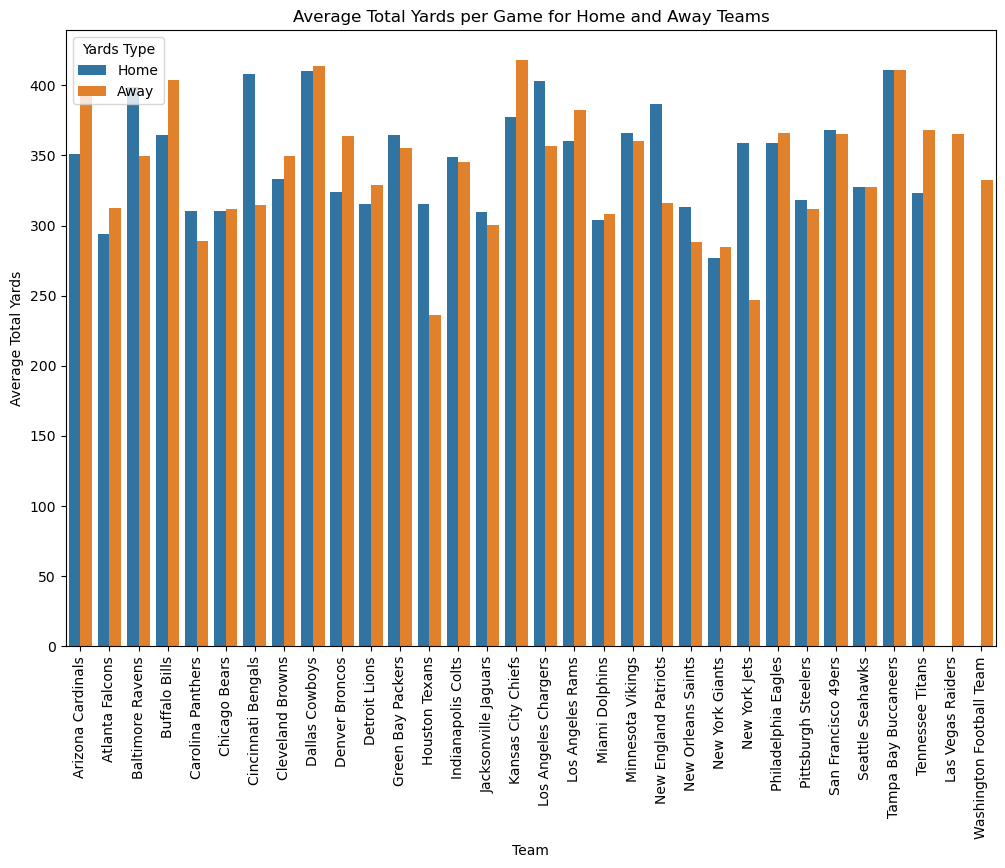

In [59]:
#Visual 1 - I want to use a bar plot to see a visualization of the average 
#yards a team has while playing at home vs away

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average total yards per game for home and away teams
home_yards_avg = merged_df.groupby('Home_Team')['Home_Team_TotalYd'].mean()
away_yards_avg = merged_df.groupby('Away_Team')['Away_Team_TotalYd'].mean()

# Create a DataFrame for plotting
yards_avg_df = pd.DataFrame({
    'Team': home_yards_avg.index.tolist() + away_yards_avg.index.tolist(),
    'Type': ['Home'] * len(home_yards_avg) + ['Away'] * len(away_yards_avg),
    'Average_Yards': home_yards_avg.tolist() + away_yards_avg.tolist()
})

# bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Average_Yards', hue='Type', data=yards_avg_df)
plt.xticks(rotation=90)
plt.title('Average Total Yards per Game for Home and Away Teams')
plt.xlabel('Team')
plt.ylabel('Average Total Yards')
plt.legend(title='Yards Type')
plt.show()


Visually, there seems to be a difference, but there isn't a consistent trend throughout the league. There are some teams that tend to skew in 1 direction, like Cincinati Bengals being close to 100 yards difference at home vs away, but teams generally have similar yards.

In [60]:
#I will calculate the average total yards for all teams on home games vs 
#away games

# Filter out the teams with data issues (see home yards from previous visualization)
filtered_df = merged_df[~merged_df['Home_Team'].isin(['Las Vegas Raiders', 'Washington Football Team']) &
                        ~merged_df['Away_Team'].isin(['Las Vegas Raiders', 'Washington Football Team'])]

# Calculate average total yards for each team when they are home and round to whole numbers
home_avg_yards = filtered_df.groupby('Home_Team')['Home_Team_TotalYd'].mean().round()

# Calculate average total yards for each team when they are away and round to whole numbers
away_avg_yards = filtered_df.groupby('Away_Team')['Away_Team_TotalYd'].mean().round()

# Display the results
print("Average Home Yards per Team (Excluding Specific Teams):")
print(home_avg_yards)
print("\nAverage Away Yards per Team (Excluding Specific Teams):")
print(away_avg_yards)


Average Home Yards per Team (Excluding Specific Teams):
Home_Team
Arizona Cardinals       351.0
Atlanta Falcons         283.0
Baltimore Ravens        399.0
Buffalo Bills           350.0
Carolina Panthers       312.0
Chicago Bears           310.0
Cincinnati Bengals      408.0
Cleveland Browns        345.0
Dallas Cowboys          392.0
Denver Broncos          317.0
Detroit Lions           316.0
Green Bay Packers       372.0
Houston Texans          315.0
Indianapolis Colts      360.0
Jacksonville Jaguars    310.0
Kansas City Chiefs      378.0
Los Angeles Chargers    406.0
Los Angeles Rams        360.0
Miami Dolphins          304.0
Minnesota Vikings       366.0
New England Patriots    386.0
New Orleans Saints      313.0
New York Giants         298.0
New York Jets           359.0
Philadelphia Eagles     336.0
Pittsburgh Steelers     317.0
San Francisco 49ers     368.0
Seattle Seahawks        328.0
Tampa Bay Buccaneers    411.0
Tennessee Titans        323.0
Name: Home_Team_TotalYd, dtype: fl

In [61]:
#Now I will calculate the average for all teams, not just individually
# Exclude specific teams who's data came up with errors so it will not affect averages
filtered_df = merged_df[~merged_df['Home_Team'].isin(['Las Vegas Raiders', 'Washington Commanders']) & 
                        ~merged_df['Away_Team'].isin(['Las Vegas Raiders', 'Washington Commanders'])]

# Calculate average total yards for home games
average_home_yards = filtered_df['Home_Team_TotalYd'].mean()

# Calculate average total yards for away games
average_away_yards = filtered_df['Away_Team_TotalYd'].mean()

# Print results
print(f'Average Home Team Total Yards: {round(average_home_yards)}')
print(f'Average Away Team Total Yards: {round(average_away_yards)}')


Average Home Team Total Yards: 348
Average Away Team Total Yards: 339


Average Difference between Home and Away Total Yards: 7.95


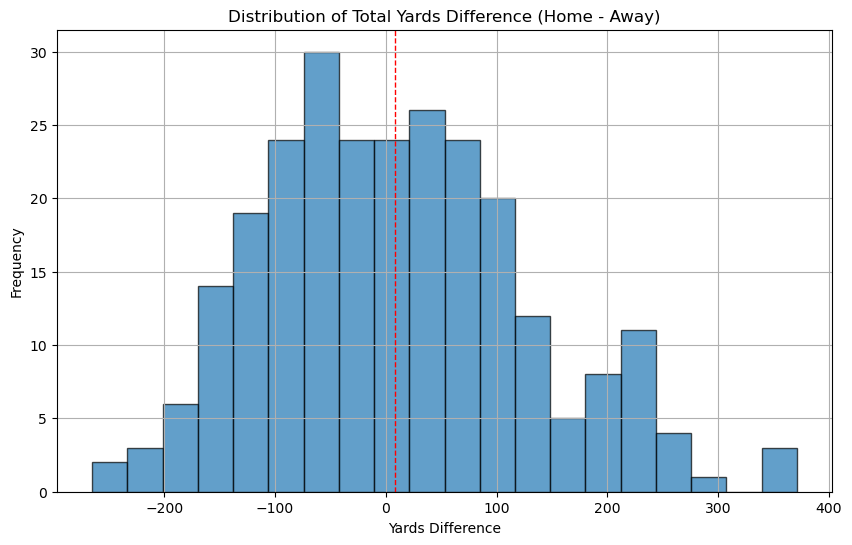

In [62]:
# Step 1: Calculate the difference between home and away total yards
merged_df['Yards_Difference'] = merged_df['Home_Team_TotalYd'] - merged_df['Away_Team_TotalYd']

# Step 2: Compute the average difference
average_difference = merged_df['Yards_Difference'].mean()

# Print the average difference
print(f"Average Difference between Home and Away Total Yards: {average_difference:.2f}")

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Yards_Difference'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(average_difference, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Total Yards Difference (Home - Away)')
plt.xlabel('Yards Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

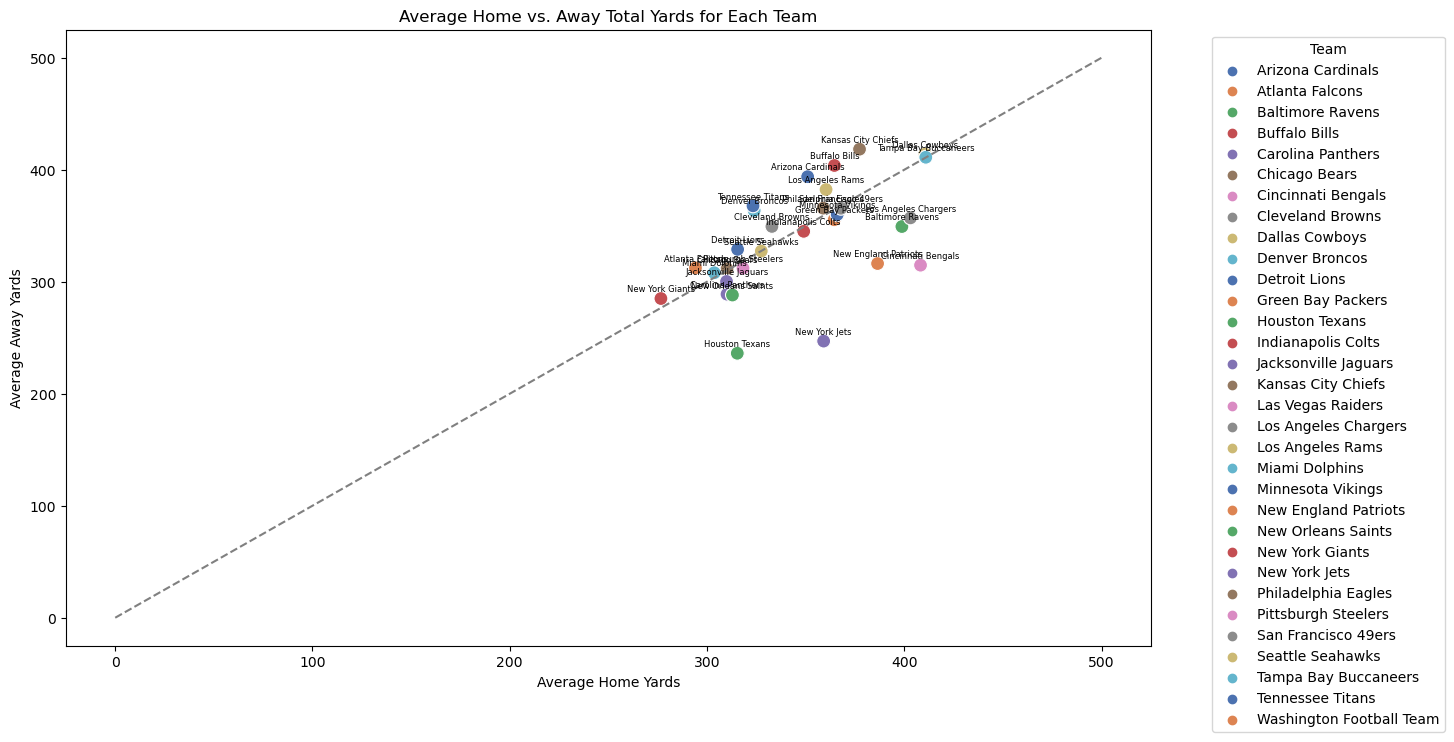

In [63]:
# Calculate average total yards for each team when they are home
home_avg_yards = merged_df.groupby('Home_Team')['Home_Team_TotalYd'].mean()

# Calculate average total yards for each team when they are away
away_avg_yards = merged_df.groupby('Away_Team')['Away_Team_TotalYd'].mean()

# Combine the results into a single DataFrame
yards_avg_df = pd.DataFrame({
    'Team': home_avg_yards.index.tolist() + away_avg_yards.index.tolist(),
    'Type': ['Home'] * len(home_avg_yards) + ['Away'] * len(away_avg_yards),
    'Average_Yards': home_avg_yards.tolist() + away_avg_yards.tolist()
})

# Pivot the DataFrame to have home and away yards in separate columns
yards_avg_pivot = yards_avg_df.pivot(index='Team', columns='Type', values='Average_Yards').reset_index()

# Plotting
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x='Home', y='Away', data=yards_avg_pivot, s=100, hue='Team', palette='deep')

# Annotate each point with the team name
for i in range(len(yards_avg_pivot)):
    ax.annotate(
        yards_avg_pivot['Team'][i],
        (yards_avg_pivot['Home'][i], yards_avg_pivot['Away'][i]),
        textcoords="offset points",
        xytext=(0,5),
        ha='center',
        fontsize=6  
    )

plt.plot([0, 500], [0, 500], '--', color='gray')  # Line of equality
plt.title('Average Home vs. Away Total Yards for Each Team')
plt.xlabel('Average Home Yards')
plt.ylabel('Average Away Yards')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [64]:
# Filter data for my favorite team, the San Francisco 49ers just for fun
sf_home = merged_df[merged_df['Home_Team'] == 'San Francisco 49ers']
sf_away = merged_df[merged_df['Away_Team'] == 'San Francisco 49ers']

# Calculate average total yards
avg_sf_home_yards = sf_home['Home_Team_TotalYd'].mean()
avg_sf_away_yards = sf_away['Away_Team_TotalYd'].mean()

avg_sf_home_yards, avg_sf_away_yards

(367.875, 365.6)

*Answer to research question:* From both a visual and statistical standpoint, leaguewide there is no major difference between total yards when playing at home or at an opposing stadium. The average difference between total home yards vs total away yards is roughly 8 yards. 

The distribution is in a bell curve shape, where a majority of the teams are within +/-100 yards. There are outliers like the Cinicati Bengals or the New York Jets, but there will need to be other factors to dig deeper into. This could be weather, injuries of certain players, or just the strength of schedule.  

*Research question:* How does points per game for each team vary when playing at home vs playing as an away team?

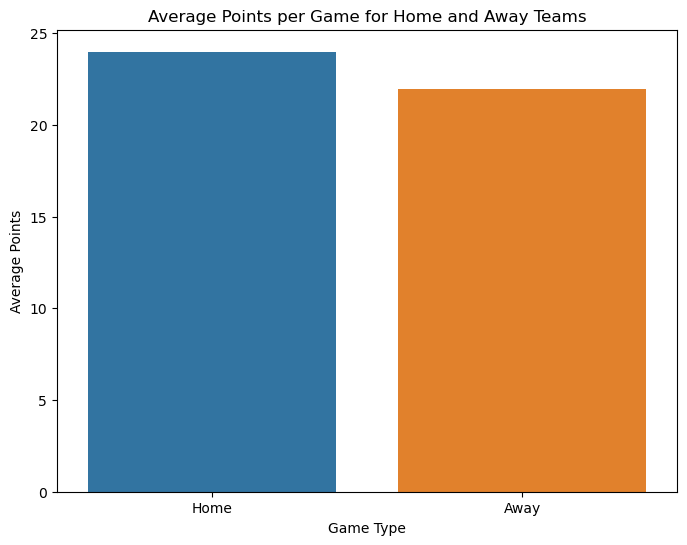

In [65]:
# Calculate average points per game for home and away teams
average_home_points = merged_df['Home_Team_Points'].astype(float).mean()
average_away_points = merged_df['Away_Team_Points'].astype(float).mean()

# Create a DataFrame for plotting
points_avg_df = pd.DataFrame({
    'Type': ['Home', 'Away'],
    'Average_Points': [average_home_points, average_away_points]
})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Average_Points', data=points_avg_df)
plt.title('Average Points per Game for Home and Away Teams')
plt.xlabel('Game Type')
plt.ylabel('Average Points')
plt.show()

In [66]:
# Display only the average points without any additional output
print(f"Average Points at Home: {average_home_points}")
print(f"Average Points Away: {average_away_points}")


Average Points at Home: 23.996153846153845
Average Points Away: 21.96153846153846


The difference looks very minor, theres is less than field goal difference (3 points) in points from being at home vs away when averaging the entire league.

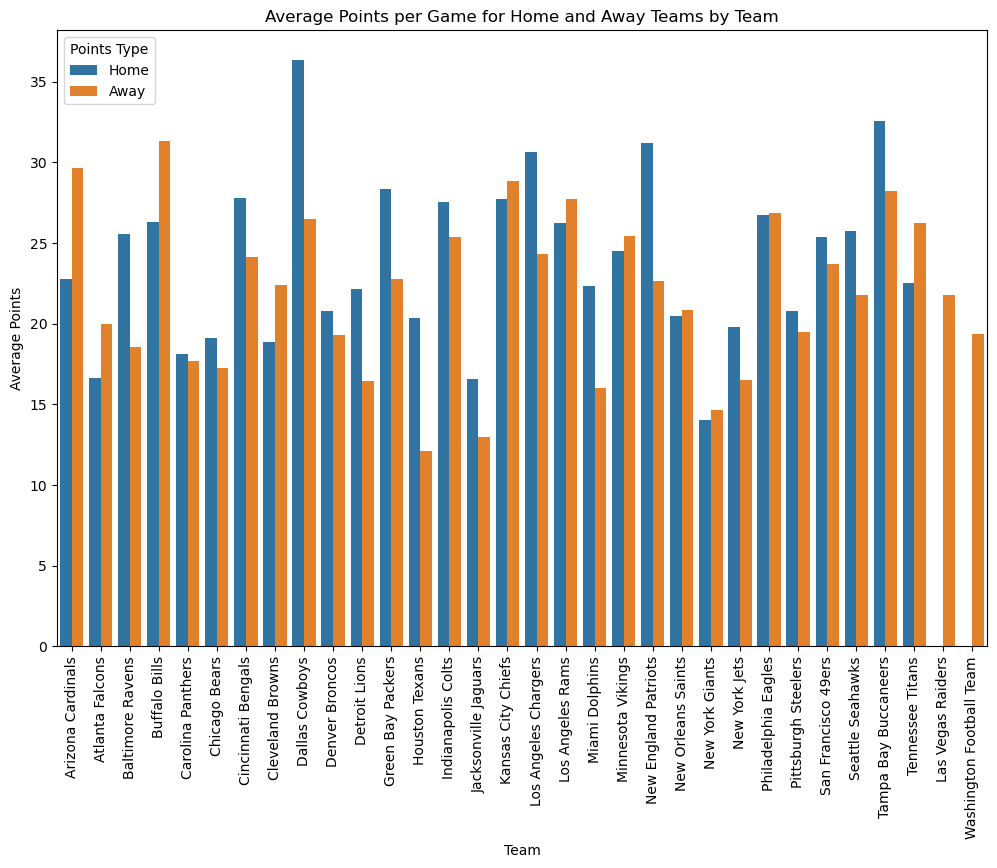

In [67]:
#Creating a bar plot to show average points per game as a home team vs
#being an away team for the whole league

# Ensure 'Home_Team_Points' and 'Away_Team_Points' are numeric
merged_df['Home_Team_Points'] = pd.to_numeric(merged_df['Home_Team_Points'], errors='coerce')
merged_df['Away_Team_Points'] = pd.to_numeric(merged_df['Away_Team_Points'], errors='coerce')

# Calculate average points per game for home and away teams, grouped by team
home_points_avg = merged_df.groupby('Home_Team')['Home_Team_Points'].mean()
away_points_avg = merged_df.groupby('Away_Team')['Away_Team_Points'].mean()

# Create a DataFrame for plotting
points_avg_df = pd.DataFrame({
    'Team': home_points_avg.index.tolist() + away_points_avg.index.tolist(),
    'Type': ['Home'] * len(home_points_avg) + ['Away'] * len(away_points_avg),
    'Average_Points': home_points_avg.tolist() + away_points_avg.tolist()
})

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Average_Points', hue='Type', data=points_avg_df)
plt.xticks(rotation=90)
plt.title('Average Points per Game for Home and Away Teams by Team')
plt.xlabel('Team')
plt.ylabel('Average Points')
plt.legend(title='Points Type')
plt.show()


From the graph, there are definitely outliers, but teams generally score similar points at home vs away, as also shown by the average difference being 2 points. This also makes sense since when you bet on a team, the home team gets roughly 3 points on the spread.

In [68]:
# Calculate average points per game for home and away teams
home_points_avg = merged_df.groupby('Home_Team')['Home_Team_Points'].mean()
away_points_avg = merged_df.groupby('Away_Team')['Away_Team_Points'].mean()

# Convert to numeric in case some values are still non-numeric
home_points_avg = pd.to_numeric(home_points_avg, errors='coerce')
away_points_avg = pd.to_numeric(away_points_avg, errors='coerce')

# Get the top 3 teams with the highest average points at home
top_3_home_teams = home_points_avg.sort_values(ascending=False).head(3)

# Get the top 3 teams with the highest average points away
top_3_away_teams = away_points_avg.sort_values(ascending=False).head(3)

print("Top 3 Teams with Highest Average Points at Home:")
print(top_3_home_teams)

print("\nTop 3 Teams with Highest Average Points Away:")
print(top_3_away_teams)


Top 3 Teams with Highest Average Points at Home:
Home_Team
Dallas Cowboys          36.375000
Tampa Bay Buccaneers    32.555556
New England Patriots    31.222222
Name: Home_Team_Points, dtype: float64

Top 3 Teams with Highest Average Points Away:
Away_Team
Buffalo Bills         31.333333
Arizona Cardinals     29.666667
Kansas City Chiefs    28.833333
Name: Away_Team_Points, dtype: float64


In [69]:
# Calculate average points per game for home and away teams
home_points_avg = merged_df.groupby('Home_Team')['Home_Team_Points'].mean()
away_points_avg = merged_df.groupby('Away_Team')['Away_Team_Points'].mean()

# Convert to numeric in case some values are still non-numeric
# There have been pervious errors in dataset where this was a problem 
home_points_avg = pd.to_numeric(home_points_avg, errors='coerce')
away_points_avg = pd.to_numeric(away_points_avg, errors='coerce')

# Get the top 3 teams with the highest average points at home
top_3_home_teams = home_points_avg.sort_values(ascending=False).head(3).index

# Get the top 3 teams with the highest average points away
top_3_away_teams = away_points_avg.sort_values(ascending=False).head(3).index

# Calculate average points in the opposite scenario to compare
top_3_home_opposite = away_points_avg[top_3_home_teams]
top_3_away_opposite = home_points_avg[top_3_away_teams]

# Create DataFrames for better visualization
top_3_home_df = pd.DataFrame({
    'Team': top_3_home_teams,
    'Home_Avg_Points': home_points_avg[top_3_home_teams],
    'Away_Avg_Points_Opposite': top_3_home_opposite
})

top_3_away_df = pd.DataFrame({
    'Team': top_3_away_teams,
    'Away_Avg_Points': away_points_avg[top_3_away_teams],
    'Home_Avg_Points_Opposite': top_3_away_opposite
})


print("Top 3 Teams with Highest Average Points at Home and Their Average Points Away:")
print(top_3_home_df)

print("\nTop 3 Teams with Highest Average Points Away and Their Average Points at Home:")
print(top_3_away_df)



Top 3 Teams with Highest Average Points at Home and Their Average Points Away:
                                      Team  Home_Avg_Points  \
Home_Team                                                     
Dallas Cowboys              Dallas Cowboys        36.375000   
Tampa Bay Buccaneers  Tampa Bay Buccaneers        32.555556   
New England Patriots  New England Patriots        31.222222   

                      Away_Avg_Points_Opposite  
Home_Team                                       
Dallas Cowboys                          26.500  
Tampa Bay Buccaneers                    28.250  
New England Patriots                    22.625  

Top 3 Teams with Highest Average Points Away and Their Average Points at Home:
                                  Team  Away_Avg_Points  \
Away_Team                                                 
Buffalo Bills            Buffalo Bills        31.333333   
Arizona Cardinals    Arizona Cardinals        29.666667   
Kansas City Chiefs  Kansas City Chiefs      

*Answer to research question:* Similar to total yards, there is not much difference leaguewide on the average points a team scores while playing at home vs an opposing stadium. The average points scored at home is roughly 24, and it only goes down to 22 when away. This 2 point difference is probably why when betting on NFL games, the hometeam gets 3 points on the spread. 

There are teams like the Dallas Cowboys where they scored an average of 10 points more at home than away. There could be interesting reasons if I were to dig deeper. Also there are teams that scored higher as the away team like the Buffalo Bills, but that could be due to weather. It is much easier to score points when you are not playing in snow or high wind cold games. 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time, I would do this same analysis for more years than just 2021 to see how trends track over time. I also would have liked to see how well teams play in the first half of the season compared to the second half of the season, and see how that looks like over years and how that relates to having a positive record or even the chances of making the playoffs.

With how often some teams can lose key players, it would be nice seeing if there are big swings in performance year to year.